## Football Analytics with Statsbomb Data

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch, Sbopen

In [3]:
#parsing
sb = Sbopen()

In [4]:
#looking for competitons
competitions = sb.competition()
competitions.info()
competitions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [5]:
#looking for matches in selected competition and season
matches = sb.match(competition_id = 43, season_id = 106)
matches.info()
matches

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,...,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,2022-11-22 18:00:00,0,0,available,available,2023-04-19 06:53:07.045195,2023-04-27 00:49:30.005344,1,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1701.0,Chris Beath,14.0,Australia
60,3857262,2022-12-02,2022-12-02 17:00:00,2,1,available,available,2023-03-17 22:58:19.035038,2023-04-26 23:48:08.999798,3,...,10,Group Stage,94425,Education City Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina
61,3857261,2022-11-29,2022-11-29 21:00:00,0,3,available,available,2023-03-27 07:45:00.892102,2023-04-27 00:02:44.241621,3,...,10,Group Stage,1000793,Ahmad bin Ali Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia
62,3857255,2022-12-01,2022-12-01 21:00:00,2,1,available,available,2023-03-30 12:03:47.965683,2023-04-26 23:51:48.352990,3,...,10,Group Stage,1000253,Sheikh Khalifa International Stadium,185,Qatar,2366.0,Victor Miguel de Freitas Gomes,211.0,South Africa


### 2022 World Cup Final Match

In [7]:
#selected match_id
match = 3869685

In [8]:
#looking lineups
lineups = sb.lineup(match)
lineups.info()
lineups

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        50 non-null     int64 
 1   player_name      50 non-null     object
 2   player_nickname  50 non-null     object
 3   jersey_number    50 non-null     int64 
 4   match_id         50 non-null     int64 
 5   team_id          50 non-null     int64 
 6   team_name        50 non-null     object
 7   country_id       50 non-null     int64 
 8   country_name     50 non-null     object
dtypes: int64(5), object(4)
memory usage: 3.6+ KB


,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,2972,Marcus Thuram,Marcus Thuram,26,3869685,771,France,78,France
1,3009,Kylian Mbappé Lottin,Kylian Mbappé,10,3869685,771,France,78,France
2,3026,Adrien Rabiot,Adrien Rabiot,14,3869685,771,France,78,France
3,3099,Hugo Lloris,Hugo Lloris,1,3869685,771,France,78,France
4,3379,Alphonse Areola,Alphonse Areola,23,3869685,771,France,78,France
5,3543,Steve Mandanda,Steve Mandanda,16,3869685,771,France,78,France
6,3604,Olivier Giroud,Olivier Giroud,9,3869685,771,France,78,France
7,4445,Jules Koundé,Jules Koundé,5,3869685,771,France,78,France
8,5476,Benjamin Pavard,Benjamin Pavard,2,3869685,771,France,78,France
9,5477,Ousmane Dembélé,Ousmane Dembélé,11,3869685,771,France,78,France


In [36]:
#what happened in match...
events, related, freeze, tactics = sb.event(match)

events.info()
print("\n")
related.info()
print("\n")
freeze.info()
print("\n")
tactics.info()

# if you want only event data you can use
#df_events = sb.event(match)[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4407 non-null   object 
 1   index                           4407 non-null   int64  
 2   period                          4407 non-null   int64  
 3   timestamp                       4407 non-null   object 
 4   minute                          4407 non-null   int64  
 5   second                          4407 non-null   int64  
 6   possession                      4407 non-null   int64  
 7   duration                        3293 non-null   float64
 8   match_id                        4407 non-null   int64  
 9   type_id                         4407 non-null   int64  
 10  type_name                       4407 non-null   object 
 11  possession_team_id              4407 non-null   int64  
 12  possession_team_name            44

In [30]:
# 360 frames

#frame, visible = sb.frame(match)

# exploring the data
#frame.info()
#print("\n")
#visible.info()

In [40]:
#get team names
team1, team2 = events.team_name.unique()
team1, team2

('Argentina', 'France')

In [48]:
#A dataframe of shots
shots = events.loc[events['type_name'] == 'Shot'].set_index('id')
shots.info()
shots

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 545c2c84-018f-4570-a01c-753823feaeac to 66eaf262-999f-4953-a924-f1b596de4dbf
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           38 non-null     int64  
 1   period                          38 non-null     int64  
 2   timestamp                       38 non-null     object 
 3   minute                          38 non-null     int64  
 4   second                          38 non-null     int64  
 5   possession                      38 non-null     int64  
 6   duration                        38 non-null     float64
 7   match_id                        38 non-null     int64  
 8   type_id                         38 non-null     int64  
 9   type_name                       38 non-null     object 
 10  possession_team_id              38 non-null     int64  
 11  possession_team_name            38 

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
id,,,,,,,,,,,,,,,,,,,,,
545c2c84-018f-4570-a01c-753823feaeac,192,1,00:04:40.798000,4,40,14,0.948190,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ad26294-8aaf-4d69-83dd-bbf9ef797b32,340,1,00:07:36.537000,7,36,18,0.422018,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6d498191-05f0-432c-8764-03aea4ef9fb8,602,1,00:16:15.886000,16,15,27,0.872980,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6d527ebc-a948-4cd8-ac82-daced35bb715,771,1,00:22:24.114000,22,24,32,0.625635,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f227a92e-d86c-4f3d-aa75-5ccb71adcae6,979,1,00:31:35.181000,31,35,46,3.284765,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,1178,1,00:35:22.647000,35,22,52,0.466153,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13a4889d-ad08-41be-9125-24c4c7d7879a,1916,2,00:03:49.971000,48,49,86,0.867950,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43691970-1dad-4e11-bd29-48f640c55ea1,2204,2,00:13:21.380000,58,21,107,0.426019,3869685,16,Shot,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
9615ffbc-b513-45e6-9ccc-015234483f95,2235,2,00:14:51.755000,59,51,116,0.718656,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


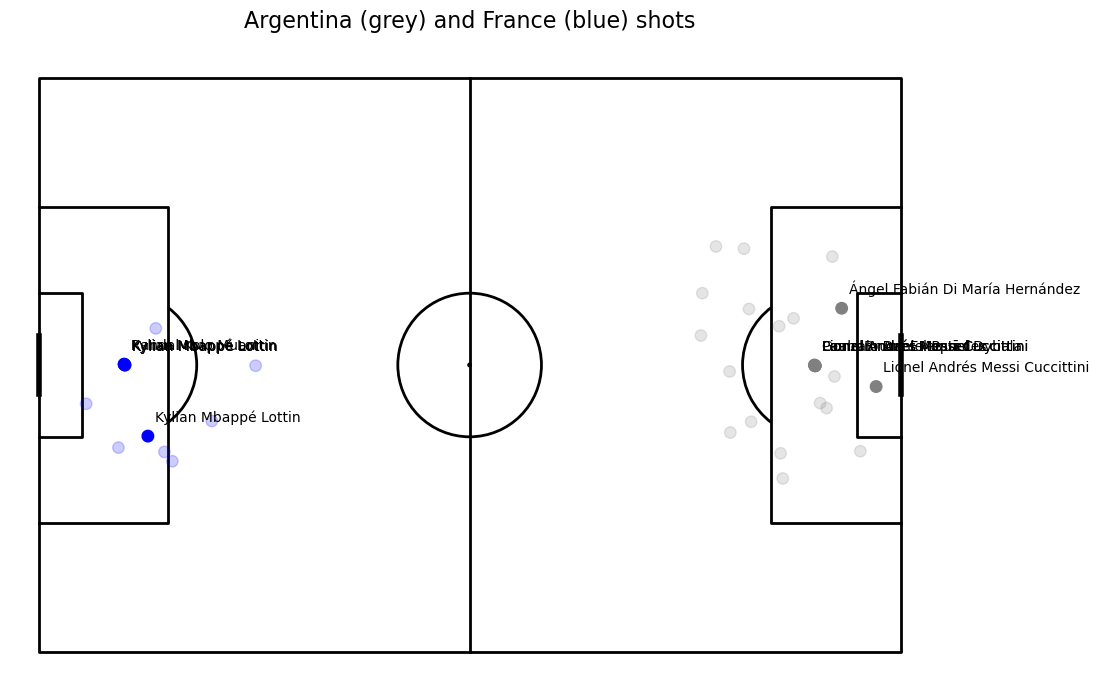

In [110]:
# Draw the pitch using the MPL Soccer class

pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=0.8
    
    #plot Argentina
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="grey")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="grey")
            shotCircle.set_alpha(.2)
    
    #plot France
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

#set title
fig.suptitle("Argentina (grey) and France (blue) shots", fontsize = 16)
fig.set_size_inches(20, 7)
plt.show()